In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from torch import nn
from sklearn.model_selection import train_test_split

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [22]:
data_df = pd.read_excel(r'../../data/custom_data_4.xlsx')

In [23]:
X=data_df.iloc[:,:2].to_numpy(dtype=float)
y = data_df['Color Class'].to_numpy(dtype=float)

In [10]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [24]:
X,y = torch.from_numpy(X).type(torch.float).to(device),torch.from_numpy(y).type(torch.float).to(device)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
len(X_train),len(X_test),len(y_train),len(y_test)

(1696, 424, 1696, 424)

In [27]:
X_train.device,X_test.device,y_train.device,y_test.device

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

In [154]:
class ModuleArchitecture(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layers=nn.Sequential(
            nn.Linear(in_features=2,out_features=10),
            nn.Linear(in_features=10,out_features=10),
            nn.Linear(in_features=10,out_features=1),
            nn.ReLU()
            
        )
    
    def forward(self,x):
        return self.layers(x)

In [117]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_0 = CircleModelV2().to(device)
print(model_0)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [36]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=20),
    nn.ReLU(),
    nn.Linear(in_features=20, out_features=20),
    nn.Linear(in_features=20, out_features=20),
    nn.Linear(in_features=20, out_features=20),
    nn.ReLU(),
    nn.Linear(in_features=20, out_features=20),
    nn.Linear(in_features=20, out_features=20),
    nn.Linear(in_features=20, out_features=1),
    
).to(device)

In [156]:
X_test

tensor([[-3.7519e-01,  6.8266e-01],
        [ 1.5380e-02,  9.6003e-01],
        [-7.0278e-01, -3.1472e-01],
        [-2.8525e-01,  9.6638e-01],
        [ 4.0242e-01, -7.4375e-01],
        [ 6.3228e-01, -5.7111e-01],
        [ 8.5607e-01,  5.4994e-01],
        [ 1.0034e+00,  1.9028e-01],
        [-7.4892e-01, -2.9511e-01],
        [ 5.3780e-02,  9.7388e-01],
        [-4.7020e-01,  7.8749e-01],
        [-2.1686e-01,  7.2418e-01],
        [ 9.7026e-01,  3.6688e-01],
        [-5.8446e-01, -5.7415e-01],
        [-9.1147e-01, -2.4631e-01],
        [ 7.6892e-01, -7.3249e-02],
        [ 3.8408e-01,  6.8299e-01],
        [-6.8364e-01,  7.1417e-01],
        [-5.7777e-01,  5.3652e-01],
        [-8.3274e-01,  4.6625e-01],
        [ 1.2448e-02,  9.8709e-01],
        [ 1.0091e+00, -2.1970e-01],
        [-6.6792e-01,  4.2861e-01],
        [-8.4405e-01,  6.1718e-01],
        [ 6.3680e-01,  7.4591e-01],
        [ 8.9413e-01,  3.6390e-01],
        [-2.3460e-01, -9.6400e-01],
        [ 8.5954e-01, -5.214

In [107]:
model_0 = ModuleArchitecture().to(device)

model_0.state_dict()

with torch.inference_mode():
    y_logits=model_0(X_train.to(device))

In [92]:
y_pred = torch.round(torch.sigmoid(y_logits))

In [93]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]], device='cuda:0')

In [37]:

#loss function 
loss_fn = torch.nn.BCEWithLogitsLoss()

#optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [38]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_true))*100
    return acc

In [40]:
epochs = 1000

for epoch in range(epochs):

    model_0.train()

    train_logits=model_0(X_train).squeeze()
    train_pred = torch.round(torch.sigmoid(train_logits))


    train_loss = loss_fn(train_logits,y_train)
    train_acc = accuracy_fn(y_train,train_pred)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():

        test_logits=model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_test,test_pred)

    if epoch % 10 == 0 :
        print(f'epoch: {epoch}, training loss:{train_loss}, testing loss:{test_loss}, training acc:{train_acc},testing acc:{test_acc}')


epoch: 0, training loss:0.4952050447463989, testing loss:0.49691295623779297, training acc:70.99056603773585,testing acc:70.28301886792453
epoch: 10, training loss:0.49672192335128784, testing loss:0.49834340810775757, training acc:72.75943396226415,testing acc:70.75471698113208
epoch: 20, training loss:0.5026249885559082, testing loss:0.5044872164726257, training acc:73.82075471698113,testing acc:73.11320754716981
epoch: 30, training loss:0.5047711133956909, testing loss:0.5055997967720032, training acc:74.1745283018868,testing acc:73.34905660377359
epoch: 40, training loss:0.49883008003234863, testing loss:0.49944308400154114, training acc:73.76179245283019,testing acc:71.69811320754717
epoch: 50, training loss:0.49505478143692017, testing loss:0.49618199467658997, training acc:72.75943396226415,testing acc:69.5754716981132
epoch: 60, training loss:0.4935332238674164, testing loss:0.4949690103530884, training acc:71.99292452830188,testing acc:70.28301886792453
epoch: 70, training los

In [20]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

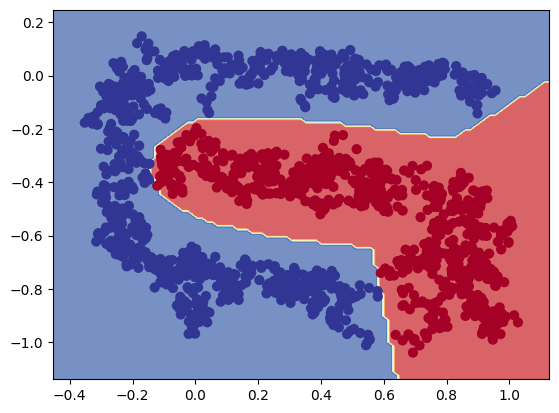

In [41]:
model_1=model_0
plot_decision_boundary(model_1,X_train,y_train)

In [113]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [114]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [116]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.56818, Accuracy: 87.75% | Test Loss: 0.57378, Test Accuracy: 86.50%
Epoch: 100 | Loss: 0.48153, Accuracy: 93.50% | Test Loss: 0.49935, Test Accuracy: 90.50%
Epoch: 200 | Loss: 0.37056, Accuracy: 97.75% | Test Loss: 0.40595, Test Accuracy: 92.00%
Epoch: 300 | Loss: 0.25458, Accuracy: 99.00% | Test Loss: 0.30333, Test Accuracy: 96.50%
Epoch: 400 | Loss: 0.17180, Accuracy: 99.50% | Test Loss: 0.22108, Test Accuracy: 97.50%
Epoch: 500 | Loss: 0.12188, Accuracy: 99.62% | Test Loss: 0.16512, Test Accuracy: 99.00%
Epoch: 600 | Loss: 0.09123, Accuracy: 99.88% | Test Loss: 0.12741, Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.07100, Accuracy: 99.88% | Test Loss: 0.10319, Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.05773, Accuracy: 99.88% | Test Loss: 0.08672, Test Accuracy: 99.50%
Epoch: 900 | Loss: 0.04853, Accuracy: 99.88% | Test Loss: 0.07474, Test Accuracy: 99.50%


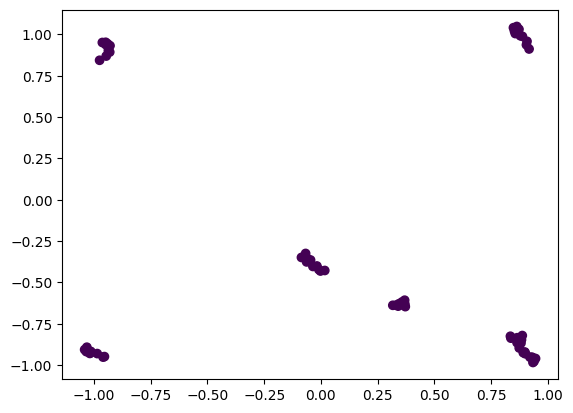

In [18]:
plt.scatter(data_df['X'],data_df['Y'],c=data_df['Color Class'])